# Retail Analysis with Walmart Data 

### Descripton
One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.


In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

In [32]:
# Load dataset
Walmart_data = pd.read_csv('Walmart_Store_sales.csv')
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Data Preparation

In [34]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [35]:
# Convert Date to DateTime Format
Walmart_data['Date'] =  pd.to_datetime(Walmart_data['Date'], format='%d-%m-%Y')
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [42]:
# Splitting Date column and create new columns (Day, Month, and Year)
Walmart_data['Day']= Walmart_data['Date'].dt.day
Walmart_data['Month']= Walmart_data['Date'].dt.month
Walmart_data['Year']= Walmart_data['Date'].dt.year

**Q1. Which store has maximum and minimum sales?**

In [45]:
# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = Walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False) 

# Last index 

last_index= total_sales_for_each_store.size 

# Store having Maximum sales
print('The store having maximum sales is Store : ',total_sales_for_each_store.head(1).index[0] )

# store having minimum sales

print('The store having minimum sales is Store : ',total_sales_for_each_store.index[last_index-1] )

The store having maximum sales is Store :  20
The store having minimum sales is Store :  33


**Q2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation**

In [48]:
# Store with maximum standard deviation
std_dev_data = Walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
max_dev_store = std_dev_data.head(1).index[0]

print('The store having maximum standard deviation is Store : ',max_dev_store, '\n')

# Coefficient of mean to standard Deviation
coef_mean_std = Walmart_data.groupby('Store')['Weekly_Sales'].std() / Walmart_data.groupby('Store')['Weekly_Sales'].mean()
print('Coefficient of mean to standard Deviation : ','\n', coef_mean_std)

The store having maximum standard deviation is Store :  14 

Coefficient of mean to standard Deviation :  
 Store
1     0.100292
2     0.123424
3     0.115021
4     0.127083
5     0.118668
6     0.135823
7     0.197305
8     0.116953
9     0.126895
10    0.159133
11    0.122262
12    0.137925
13    0.132514
14    0.157137
15    0.193384
16    0.165181
17    0.125521
18    0.162845
19    0.132680
20    0.130903
21    0.170292
22    0.156783
23    0.179721
24    0.123637
25    0.159860
26    0.110111
27    0.135155
28    0.137330
29    0.183742
30    0.052008
31    0.090161
32    0.118310
33    0.092868
34    0.108225
35    0.229681
36    0.162579
37    0.042084
38    0.110875
39    0.149908
40    0.123430
41    0.148177
42    0.090335
43    0.064104
44    0.081793
45    0.165613
Name: Weekly_Sales, dtype: float64


**Q3. Which store/s has good quarterly growth rate in Q3’2012**

In [51]:
#Sales for third quarterly in Q3'2012
Q3 = Walmart_data[(Walmart_data['Month'] >= 7) & (Walmart_data['Month'] <= 9)].groupby('Store')['Weekly_Sales'].sum()

# Store/s having good quaterly grwoth
print('Store have good quarterly growth rate in Q3’2012 is Store : ')
print(Q3.idxmax() , 'With' , str(Q3.max()))

Store have good quarterly growth rate in Q3’2012 is Store : 
4 With 81194592.89


**Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together**

**Holiday Events**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

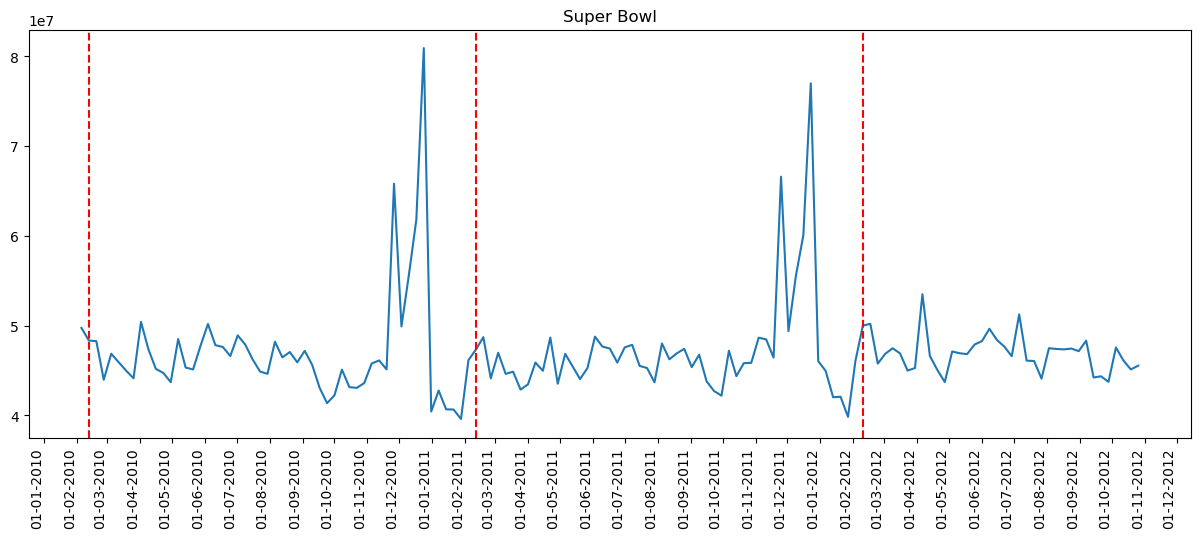

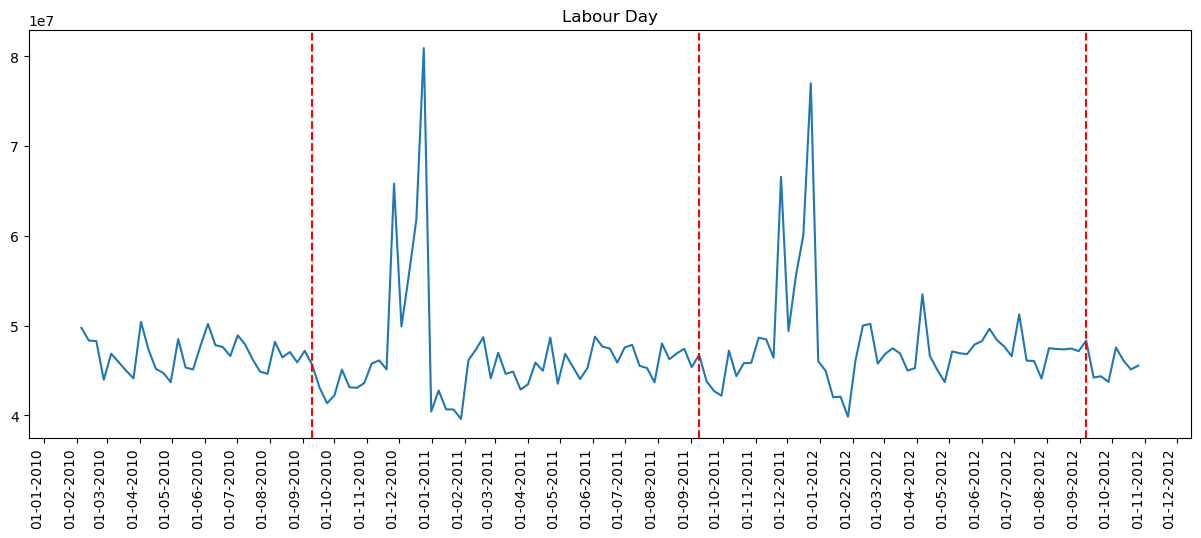

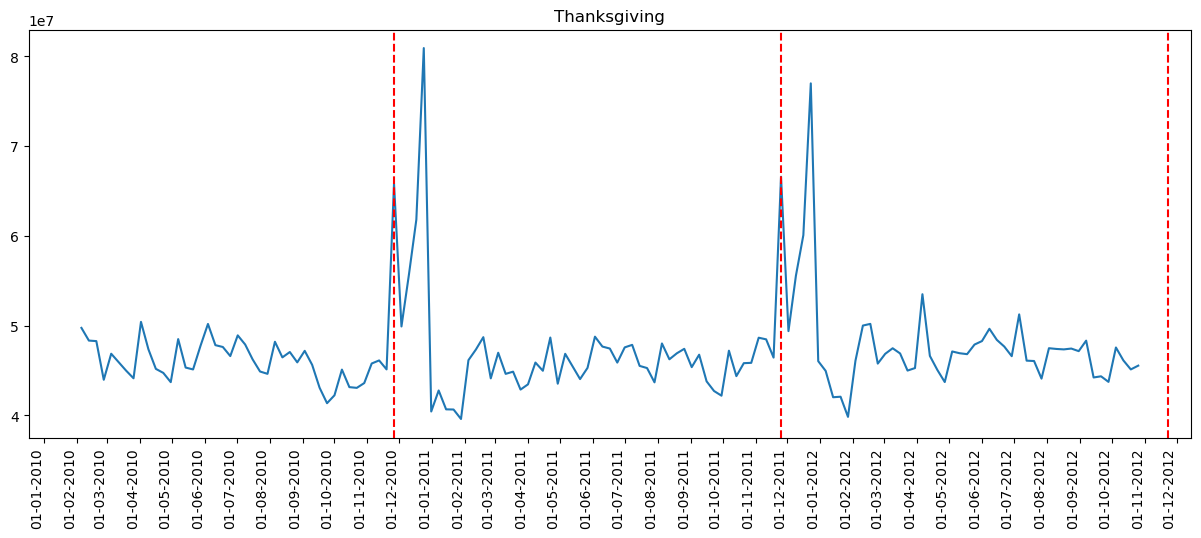

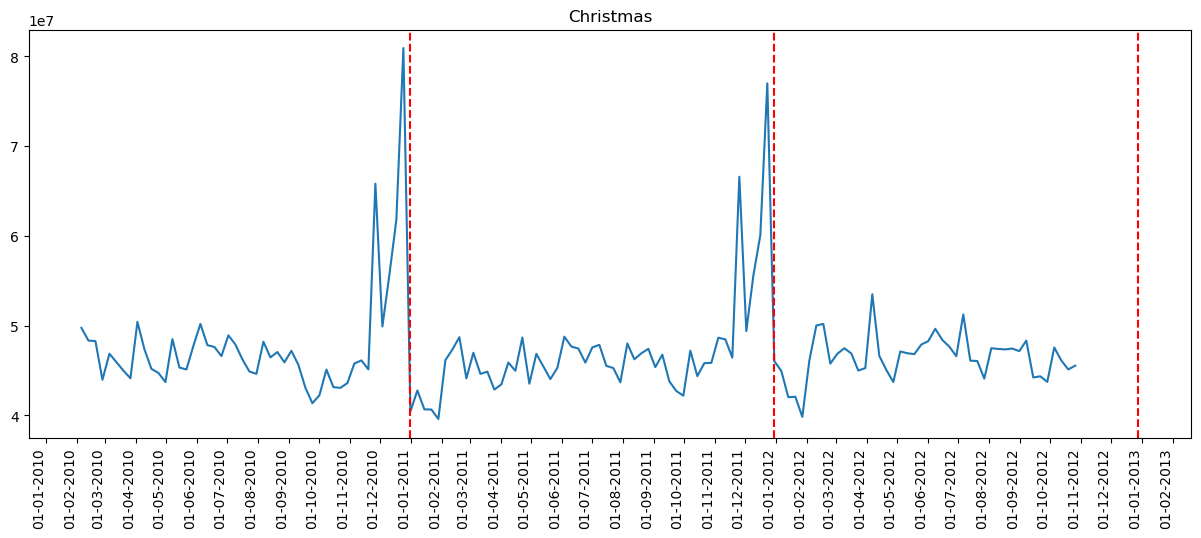

In [54]:
def plot_line(df, holiday_dates, holiday_label):
  fig, ax = plt.subplots(figsize=(15, 6))
  ax.plot(df['Date'], df['Weekly_Sales'], label='holiday_label')
  for day in holiday_dates:
    day = datetime.strptime(day, '%d-%m-%Y')
    ax.axvline(x=day, color='red', linestyle='--')

  plt.title(holiday_label)
  x_dates = df['Date'].dt.strftime('%d-%m-%Y')
  xfmt = dates.DateFormatter('%d-%m-%Y')
  ax.xaxis.set_major_formatter(xfmt)
  ax.xaxis.set_major_locator(dates.DayLocator(1))
  plt.gcf().autofmt_xdate(rotation=90)
  plt.show()

total_sales = Walmart_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')


In [77]:
Super_Bowl = pd.to_datetime(Super_Bowl, format='%d-%m-%Y')
Labour_Day = pd.to_datetime(Labour_Day, format='%d-%m-%Y')
Thanksgiving = pd.to_datetime(Thanksgiving, format='%d-%m-%Y')
Christmas = pd.to_datetime(Christmas, format='%d-%m-%Y')

<Axes: title={'center': 'Christmas holiday Sales'}, xlabel='Year'>

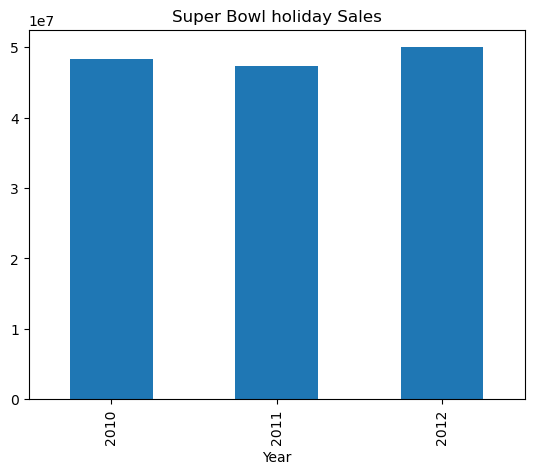

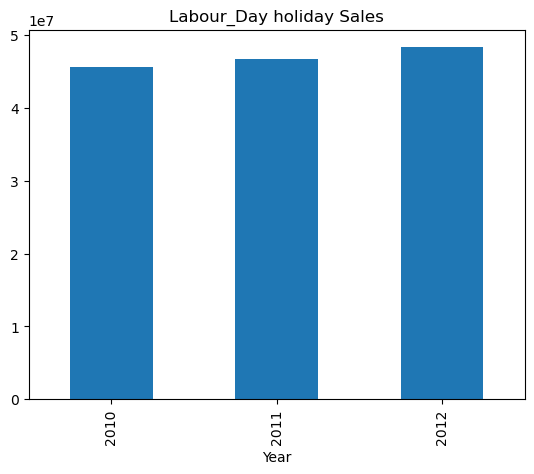

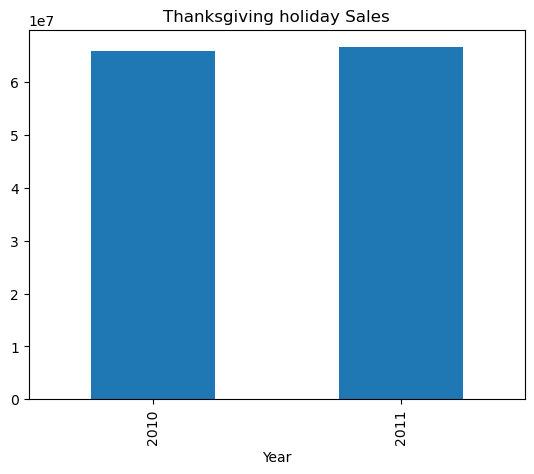

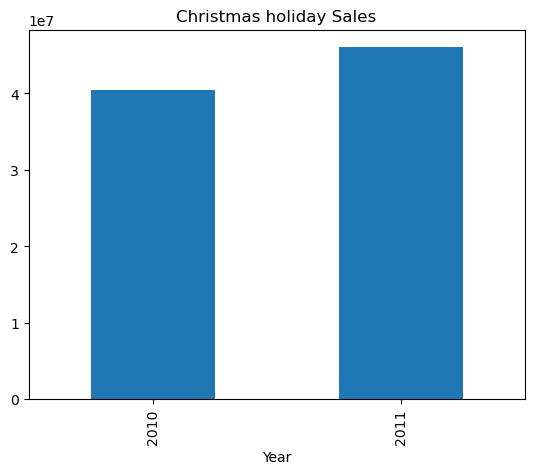

In [93]:
# Yearly Sales during holidays
Super_Bowl_df = pd.DataFrame(Walmart_data.loc[Walmart_data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(Walmart_data.loc[Walmart_data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(Walmart_data.loc[Walmart_data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(Walmart_data.loc[Walmart_data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Super Bowl holiday Sales') 
Labour_Day_df.plot(kind='bar',legend=False,title='Labour_Day holiday Sales')
Thanksgiving_df.plot(kind='bar',legend=False,title='Thanksgiving holiday Sales') 
Christmas_df.plot(kind='bar',legend=False,title='Christmas holiday Sales')



**Q5: Provide a monthly and semester view of sales in units and give insights**

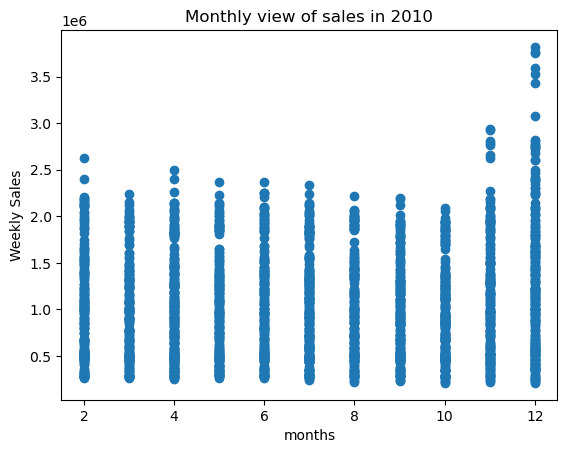

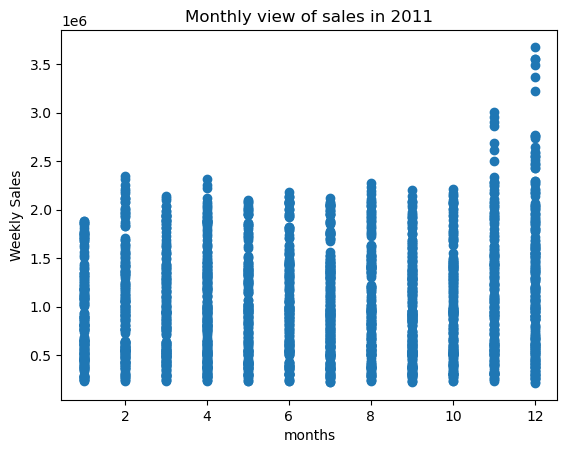

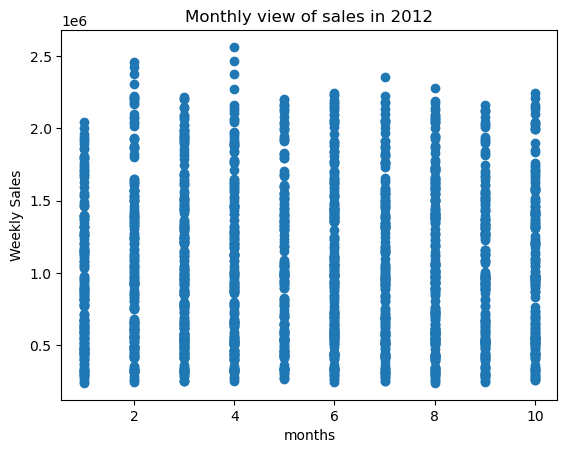

In [97]:
# Monthly view of sales for each years
plt.scatter(Walmart_data[Walmart_data.Year==2010]["Month"],Walmart_data[Walmart_data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(Walmart_data[Walmart_data.Year==2011]["Month"],Walmart_data[Walmart_data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(Walmart_data[Walmart_data.Year==2012]["Month"],Walmart_data[Walmart_data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()


**Semester view of Sales**

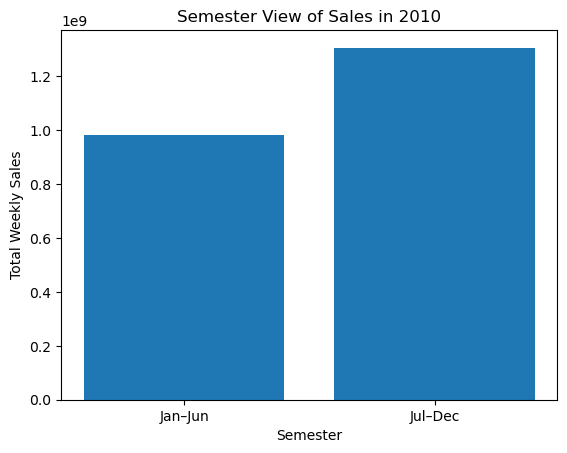

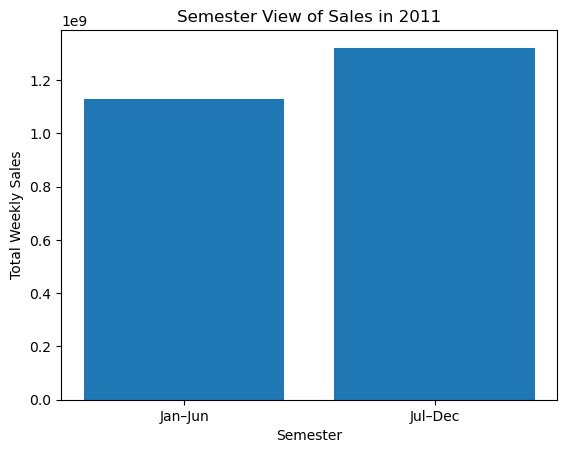

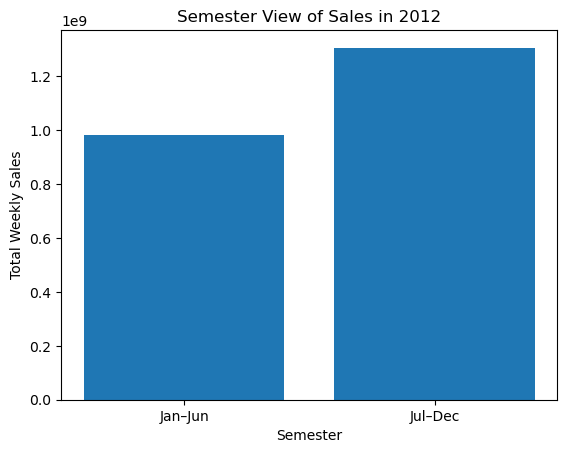

In [102]:
# Semester view sales for year 2010
Walmart_data_2010 = Walmart_data[Walmart_data.Year == 2010].copy()

# Define semester column: 1 for Jan–Jun, 2 for Jul–Dec
Walmart_data_2010['Semester'] = Walmart_data_2010['Month'].apply(lambda x: 1 if x <= 6 else 2)

# Group by Semester and compute total sales
semester_sales_2010 = Walmart_data_2010.groupby('Semester')['Weekly_Sales'].sum().reset_index()

# Plot the graph
plt.bar(semester_sales_2010['Semester'], semester_sales_2010['Weekly_Sales'], tick_label=['Jan–Jun', 'Jul–Dec'])
plt.xlabel("Semester")
plt.ylabel("Total Weekly Sales")
plt.title("Semester View of Sales in 2010")
plt.show()

# Semester view sales for year 2011
Walmart_data_2011 = Walmart_data[Walmart_data.Year == 2011].copy()

# Define semester column: 1 for Jan–Jun, 2 for Jul–Dec
Walmart_data_2011['Semester'] = Walmart_data_2011['Month'].apply(lambda x: 1 if x <= 6 else 2)

# Group by Semester and compute total sales
semester_sales_2011 = Walmart_data_2011.groupby('Semester')['Weekly_Sales'].sum().reset_index()

# Plot the graph
plt.bar(semester_sales_2011['Semester'], semester_sales_2011['Weekly_Sales'], tick_label=['Jan–Jun', 'Jul–Dec'])
plt.xlabel("Semester")
plt.ylabel("Total Weekly Sales")
plt.title("Semester View of Sales in 2011")
plt.show()

# Semester view sales for year 2012
Walmart_data_2012 = Walmart_data[Walmart_data.Year == 2012].copy()

# Define semester column: 1 for Jan–Jun, 2 for Jul–Dec
Walmart_data_2012['Semester'] = Walmart_data_2012['Month'].apply(lambda x: 1 if x <= 6 else 2)

# Group by Semester and compute total sales
semester_sales_2012 = Walmart_data_2012.groupby('Semester')['Weekly_Sales'].sum().reset_index()

# Plot the graph
plt.bar(semester_sales_2010['Semester'], semester_sales_2010['Weekly_Sales'], tick_label=['Jan–Jun', 'Jul–Dec'])
plt.xlabel("Semester")
plt.ylabel("Total Weekly Sales")
plt.title("Semester View of Sales in 2012")
plt.show()

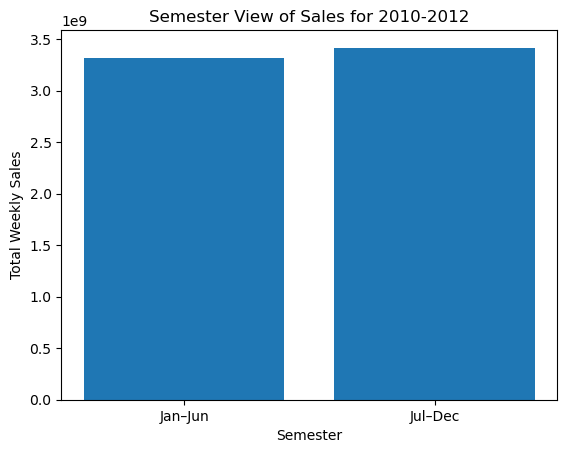

In [104]:
# Plot the bar chart for the all years combined
Walmart_data['Semester'] = Walmart_data['Month'].apply(lambda x:1 if x<=6 else 2)
Semester_sales = Walmart_data.groupby('Semester')['Weekly_Sales'].sum().reset_index()
plt.bar(Semester_sales['Semester'], Semester_sales['Weekly_Sales'], tick_label=['Jan–Jun', 'Jul–Dec'])
plt.xlabel("Semester")
plt.ylabel("Total Weekly Sales")
plt.title("Semester View of Sales for 2010-2012")
plt.show()